In [43]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

Given the following two-dimensional data set:

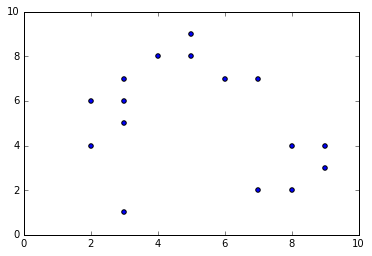

In [39]:
points = np.array([(2, 4), (2, 6), (3, 1), (3, 5), (3, 6),
                   (3, 7), (4, 8), (5, 8), (5, 9), (6, 7),
                   (7, 2), (7, 7), (8, 2), (8, 4), (9, 3), (9, 4)])

plt.scatter(points[:, 0], [points[:, 1]])
plt.axis([0, 10, 0, 10])
plt.show()

## a)
Use the heuristic from the lecture to determine input parameters $MinPts$ and $\\epsilon$ for DBSCAN
using the Manhattan distance.

$MinPts = 2 * d - 1$ with d beeing the number of dimensions.

In [35]:
def manhattan_distance(a, b):
    return abs(b[0] - a[0]) + abs(b[1] - a[1])

def k_distances(points, k=2):
    k_distances = []
    for p1 in points:
        k_distances.append(np.sort([manhattan_distance(p1, p2) for p2 in points])[k])
    return np.sort(k_distances)[::-1]

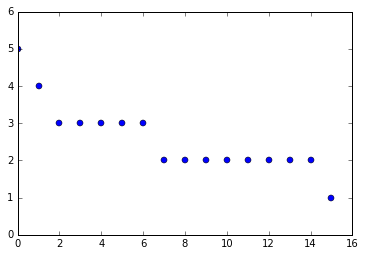

In [38]:
plt.plot(k_distances(points, k=3), 'o')
plt.axis([0, 16, 0, 6])
plt.show()

With this dispersion the user would choose $\\epsilon = 4$ or $\\epsilon = 3$.

---

## b)
Apply DBSCAN to the given data set using the Euclidean distance, $MinPts = 4$ and $\\epsilon = 2.2$.
Give the resulting clusters as sets of points and a list of all core objects.

In [41]:
def plot(cluster, core_objects):
    core_objects = np.array(core_objects)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(cluster)))

    for cluster_index, color in zip(cluster, colors):
        points = np.array(cluster[cluster_index])
        plt.scatter(points[:, 0], points[:, 1], color=color, s=100,
                    label=cluster_index)

    plt.scatter(core_objects[:, 0], core_objects[:, 1], marker='x', s=1000)
    plt.legend(loc='upper left')
    plt.axis([0, 10, 0, 10])
    plt.show(block=False)
    

def euclidian_distance(a, b):
    return math.sqrt(pow(a[0] - b[0], 2) + pow(a[1] - b[1], 2))


def get_neighbors(point_a, points, epsilon):
    distances = np.array([euclidian_distance(point_a, point_b)
                          for point_b in points])
    return points[distances <= epsilon]


def dbscan(points, epsilon, minPts):
    visited = []
    cluster = {}
    core_objects = []
    cluster_index = 0
    for point_a in points:
        if str(point_a) in visited:
            continue
        visited.append(str(point_a))
        neighbors_a = get_neighbors(point_a, points, epsilon)
        if len(neighbors_a) < minPts:
            # Mark as noise
            cluster[str(point_a)] = {'cluster': 0,
                                     'data': point_a}
        else:
            cluster_index += 1
            core_objects.append(point_a)
            cluster[str(point_a)] = {'cluster': cluster_index,
                                     'data': point_a}
            # Expand cluster
            for point_b in neighbors_a:
                if str(point_b) not in visited:
                    visited.append(str(point_b))
                    neighbors_b = get_neighbors(point_b, points, epsilon)
                    if len(neighbors_b) >= minPts:
                        neighbors_a = np.append(neighbors_a, neighbors_b)
                if str(point_b) not in cluster:
                    cluster[str(point_b)] = {'cluster': cluster_index,
                                             'data': point_b}
    # Restructure data
    cluster_to_data = {}
    for key, value in cluster.items():
        if value['cluster'] not in cluster_to_data:
            cluster_to_data[value['cluster']] = []
        cluster_to_data[value['cluster']].append(value['data'])
    return cluster_to_data, core_objects

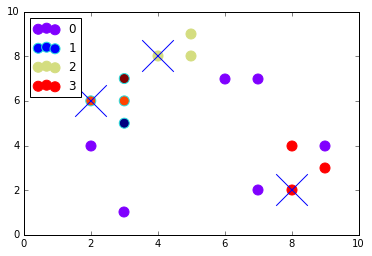

In [44]:
cluster, core_objects = dbscan(points, epsilon=2.2, minPts=4)
plot(cluster, core_objects)